In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('data/NFLX.csv', index_col='Date')
data['Time'] = np.arange(len(data.index)) # Time-step feature

columns = data.columns.to_list()
columns = columns[-1:] + columns[:-1]
data = data[columns] # Reorganize the columns

data

,Time,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2018-02-05,0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
2022-01-31,1004,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,1005,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


In [8]:
def regplot(x, y, data):
    fig, ax = plt.subplots()
    ax.plot(x, y, data=data, color='0.1')
    ax = sns.regplot(x=x, y=y, data=data, ci=None, scatter_kws=dict(color='0.85'))
    ax.set_title(f'Regression plot with {x} and {y}')

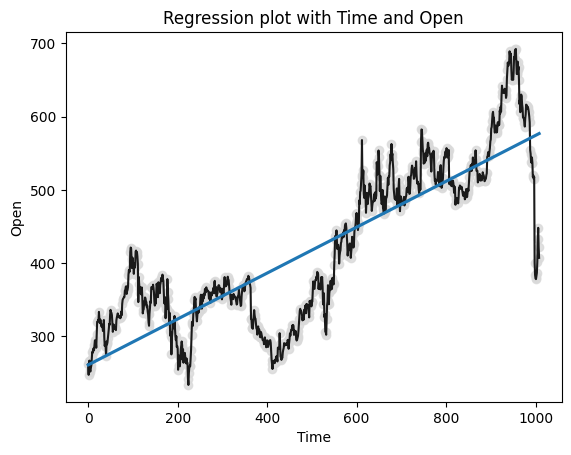

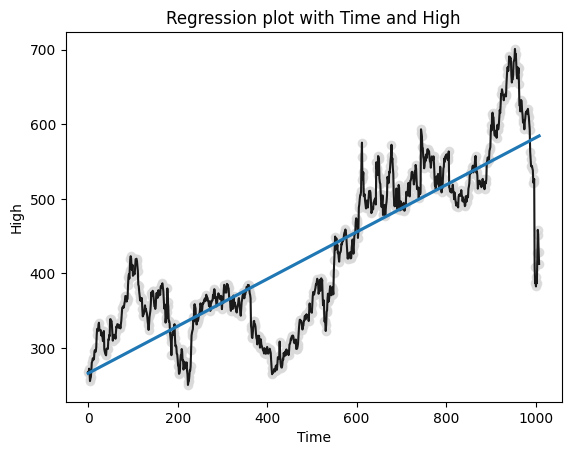

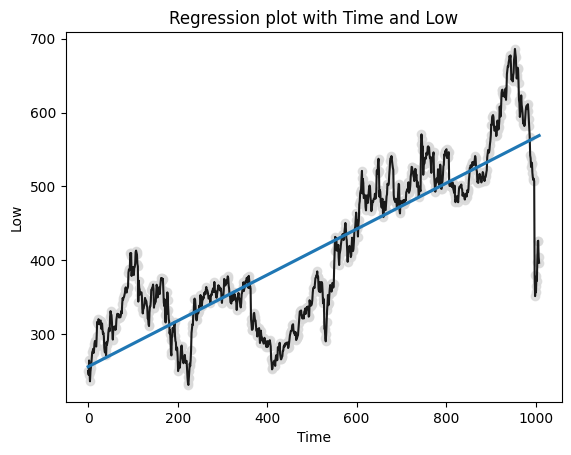

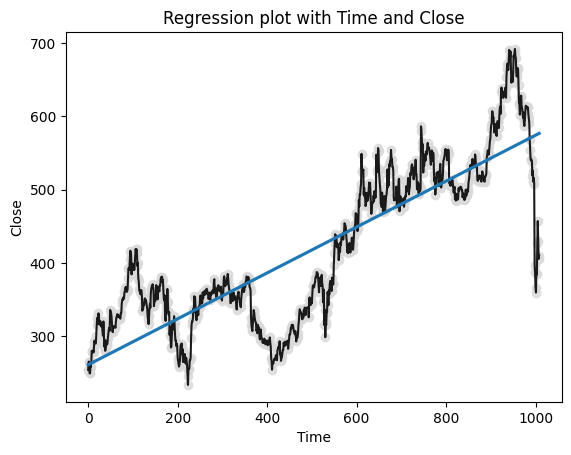

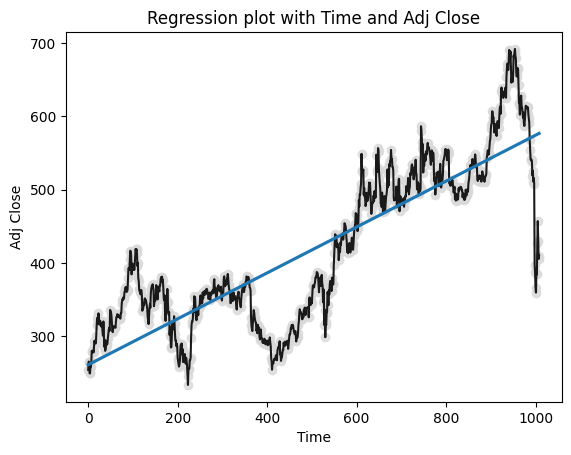

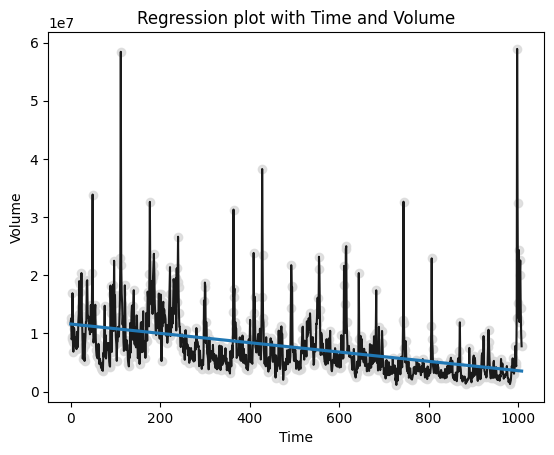

In [9]:
# Gráfico da regressão para análise com o Time-step
for column in columns[1:]:
    regplot(x='Time', y=column, data=data)

In [10]:
data['lag1_open'] = data['Open'].shift(1)

columns = data.columns.to_list()
columns = columns[:2] + columns[-1:] + columns[2:-1]
data = data[columns]
data

,Time,Open,lag1_open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,
2018-02-05,0,262.000000,NaN,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,1,247.699997,262.000000,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,2,266.579987,247.699997,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,3,267.079987,266.579987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,4,253.850006,267.079987,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...,...
2022-01-31,1004,401.970001,386.760010,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,1005,432.959991,401.970001,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,1006,448.250000,432.959991,451.980011,426.480011,429.480011,429.480011,14346000


Text(0.5, 1.0, 'Lag plot of Open')

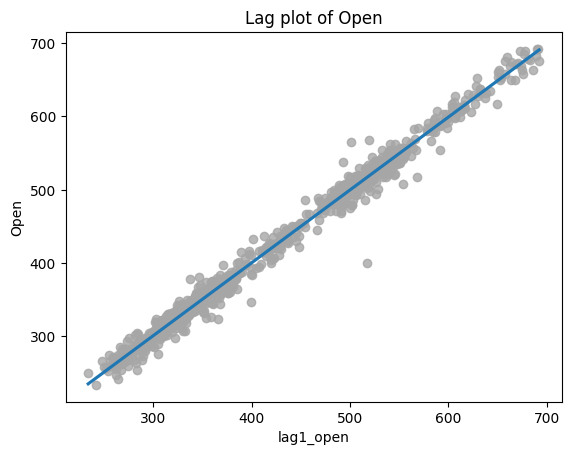

In [16]:
fig, ax = plt.subplots()
ax = sns.regplot(x='lag1_open', y='Open', data=data, ci=None, scatter_kws=dict(color='0.65'))
ax.set_title(f'Lag plot of Open')

In [20]:
data.loc[:, ['lag1_open']]

,lag1_open
Date,
2018-02-05,NaN
2018-02-06,262.000000
2018-02-07,247.699997
2018-02-08,266.579987
2018-02-09,267.079987
...,...
2022-01-31,386.760010
2022-02-01,401.970001
2022-02-02,432.959991


In [19]:
data.loc[:, 'Open']

Date
2018-02-05    262.000000
2018-02-06    247.699997
2018-02-07    266.579987
2018-02-08    267.079987
2018-02-09    253.850006
                 ...    
2022-01-31    401.970001
2022-02-01    432.959991
2022-02-02    448.250000
2022-02-03    421.440002
2022-02-04    407.309998
Name: Open, Length: 1009, dtype: float64